# **colmuns description**

 **Accident Date**
- Injury date of the claim
    - object but can be treated as a date 

 **Age at Injury**
- Age of injured worker when the injury occurred
    - float

**Alternative Dispute Resolution**
- Adjudication processes external to the Board
    - object: but still don't now what they mean
        - N: no
        - Y: yes
        - U: unknown or unclear

 **Assembly Date**
- The date the claim was first assembled
    - object but can be treated as a date

 **Attorney/Representative**
- Is the claim being represented by an Attorney?
    - object = probably boolean depanding on NaN:
        - N: no
        - Y: yes

 **Average Weekly Wage**
- The wage used to calculate workers’ compensation,
disability, or an Paid Leave wage replacement benefits
    - float

 **Birth Year**
- The reported year of birth of the injured worker
    - float but can be interpreted as a date

 **C-2 Date**
- Date of receipt of the Employer's Report of Work-Related
Injury/Illness or equivalent (formerly Form C-2)
    - object but can be interpreted as date

 **C-3 Date**
- Date Form C-3 (Employee Claim Form) was received
    - object but can be interpreted as date

 **Carrier Name**
- Name of primary insurance provider responsible for
providing workers’ compensation coverage to the injured
worker’s employer
    - object: represent the name of the company

 **Carrier Type**
- Type of primary insurance provider responsible for providing
workers’ compensation coverag
    - object
        - 1A. PRIVATE
        - 3A. SELF PUBLIC
        - 2A. SIF
        - 4A. SELF PRIVATE
        - UNKNOWN
        - SPECIAL FUND - UNKNOWN
        - 5C. SPECIAL FUND - POI CARRIER WCB MENANDS
        - 5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A) 

 **County of Injury**
- Name of the New York County where the injury occurred
    - object

 **COVID-19 Indicator**
- Indication that the claim may be associated with COVID-19
    - object = boolean probably boolean depanding on NaN:
        - Y
        - N

 **District Name**
- Name of the WCB district office that oversees claims for that
region or area of the state.
    - object
        - NYC
        - ALBANY
        - HAUPPAUGE
        - BUFFALO
        - SYRACUSE
        - ROCHESTER
        - BINGHAMTON
        - STATEWIDE

 **First Hearing Date**
- Date the first hearing was held on a claim at a WCB hearing
location. A blank date means the claim has not yet had a
hearing held
    - object but can be treated as date:

 **Gender**
 - The reported gender of the injured worker.
    - object:
        - M
        - F
        - U
        - X

 **IME-4 Count**
- Number of IME-4 forms received per claim. The IME-4 form is
the
“Independent Examiner's Report of Independent Medical
Examination” form
    - float but probably int64

 **Industry Code**
- NAICS code and descriptions are available at:
https://www.naics.com/search-naics-codes-by-industry/. 
different industry like mining, utilities, art, health care 
    - float but probably int64

 **Industry Code Description**
- 2-digit NAICS industry code description used to classify
businesses according to their economic activity.
    - object

 **Medical Fee Region**
- Approximate region where the injured worker would receive
medical service.
    - object

 **OIICS Nature of Injury Description**
- The OIICS nature of injury codes & descriptions are available
at https://www.bls.gov/iif/oiics_manual_2007.pdf.
    - float: but only null values 

 **WCIO Cause of Injury Code**
- The WCIO cause of injury codes & descriptions are at
https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf
    - float but probably int64

 **WCIO Cause of Injury Description**
- See description of field above.
    - object

 **WCIO Nature of Injury Code**
- The WCIO nature of injury are available at
https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf
    - float but probably int64

 **WCIO Nature of Injury Description**
 - See description of field above.
    - object

 **WCIO Part Of Body Code**
 - The WCIO part of body codes & descriptions are available at
https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf
    - flaot but probably int64

 **WCIO Part Of Body Description**
- See description of field above.
    - object

 **Zip Code**
- The reported ZIP code of the injured worker’s home address
    - object but with numbers 
        - might be neccesary to change them into int64 althought they should be treated as categorical Data

 **Agreement Reached**
- Binary variable: Yes if there is an agreement without the
involvement of the WCB -> unknown at the start of a claim.
    - float = boolean depeneding on the NaN

 **WCB Decision**
- Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim
    - object
        - "contains only not work related" 

 **Claim Injury Type** **Claim Identifier** 
 - Main target variable: Deliberation of the WCB relative to
benefits awarded to the claim. Numbering indicates severity. the two colmuns describe the same thing one with a code and the other with a 
name **if we use one as our target we should make sure that we take the other out!!!**
    - object
        - NON-COMP
        - TEMPORARY
        - MED ONLY
        - PPD SCH LOSS
        - CANCELLED
        - PPD NSL
        - DEATH
        - PTD

#### **a lot of columns a repeating with first the code and then the description we should check if the actually correspond and probably drop on of tem**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

train_data = pd.read_csv('./train_data.csv')
train_data.head()


/var/folders/z6/_vn8cndd4x5dmx2cpjfdkjdr0000gn/T/ipykernel_19209/3899361454.py:7: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('./train_data.csv')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### checking for claim indetifier that are bigger than usual

In [4]:
train_data['Claim Identifier'].value_counts()

Claim Identifier
292668076    2
5393875      1
5906249      1
5906224      1
5906957      1
            ..
5650784      1
5650745      1
5650625      1
5649719      1
818961390    1
Name: count, Length: 593470, dtype: int64

seems that some identifier have more than 7 numbers in them 

In [5]:
claim_ids_over_7_digits = train_data[train_data['Claim Identifier'].astype(str).str.len() > 7]

# Display the result
claim_ids_over_7_digits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19445 entries, 3 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Accident Date                       0 non-null      object 
 1   Age at Injury                       0 non-null      float64
 2   Alternative Dispute Resolution      0 non-null      object 
 3   Assembly Date                       19445 non-null  object 
 4   Attorney/Representative             0 non-null      object 
 5   Average Weekly Wage                 0 non-null      float64
 6   Birth Year                          0 non-null      float64
 7   C-2 Date                            0 non-null      object 
 8   C-3 Date                            0 non-null      object 
 9   Carrier Name                        0 non-null      object 
 10  Carrier Type                        0 non-null      object 
 11  Claim Identifier                    19445 non

all the value expect the assembly date are null so we can drop them as they don't provide any information

In [6]:
train_data = train_data[train_data['Claim Identifier'].astype(str).str.len() <= 7]

# Display the result after dropping
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 0 to 593467
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       574026 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier               

doing this removed a lot of null values and now their is columns without any NaN

#### checking reapted columns

In [7]:
filtered_columns = []
# create a list of columns names that contain the word 'Code' or 'Description'
for col in train_data.columns:
    if 'Code' in col or 'Description' in col:
        filtered_columns.append(col)


d = {'reapting col': filtered_columns,
    'count_na': [train_data[col].isna().sum() for col in filtered_columns],
    "value_counts": [sum(train_data[col].value_counts()) for col in filtered_columns],
    "unique values": [train_data[col].nunique() for col in filtered_columns],}
df_repeating_columns_check = pd.DataFrame(data=d)
df_repeating_columns_check

,reapting col,count_na,value_counts,unique values
0,Industry Code,9958,564068,24
1,Industry Code Description,9958,564068,20
2,OIICS Nature of Injury Description,574026,0,0
3,WCIO Cause of Injury Code,15640,558386,77
4,WCIO Cause of Injury Description,15640,558386,74
5,WCIO Nature of Injury Code,15657,558369,56
6,WCIO Nature of Injury Description,15657,558369,56
7,WCIO Part Of Body Code,17082,556944,57
8,WCIO Part Of Body Description,17082,556944,54
9,Zip Code,28637,545389,10060



- at first it seemed that that the number of NaN is the same 
- the number of values in the coulmns is the same
- the problem is that for most the number of unique value is not the same

#### to date_time object

In [8]:
# converts the date columns to datetime format
for col in train_data.columns:
    # fist we convert all columns containing the word 'Date' to datetime format
    if 'Date' in col:
        train_data[col] = pd.to_datetime(train_data[col], format='%Y-%m-%d')
    elif 'Year' in col:
        # Replace 0.0 with NaN
        train_data[col] = train_data[col].replace(0.0, np.nan)
        # Convert only non-NaN values to datetime
        train_data[col] = pd.to_datetime(train_data[col].dropna().astype(int).astype(str), format='%Y', errors='coerce')

train_data

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988-01-01,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973-01-01,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979-01-01,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958-01-01,2019-12-31,NaT,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.00,1952-01-01,2019-12-31,NaT,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593451,2022-12-14,35.0,N,2022-12-30,N,0.00,1987-01-01,2022-12-30,NaT,STATE INSURANCE FUND,...,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,42.0,LOWER BACK AREA,10467,0.0,Not Work Related,4.0
593455,2022-12-15,33.0,N,2022-12-31,N,0.00,1989-01-01,2022-12-31,NaT,WESCO INSURANCE CO,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,35.0,HAND,11590,0.0,Not Work Related,6.0
593456,2022-12-13,61.0,N,2022-12-31,N,991.08,1961-01-01,2022-12-31,NaT,SECURITY NATIONAL INSURANCE CO,...,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",34.0,WRIST,14227,0.0,Not Work Related,3.0
593457,2022-12-14,24.0,N,2022-12-31,N,0.00,1998-01-01,2022-12-31,NaT,TECHNOLOGY INSURANCE CO. INC.,...,59.0,USING TOOL OR MACHINERY,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",55.0,ANKLE,10029,0.0,Not Work Related,5.0


#### preprocessing categorical data

In [9]:
list_column_analyze = ['Carrier Type'
                       ,'Gender'
                       ,'Industry Code Description'
                       ,'COVID-19 Indicator'
                       ,'C-3 Date'
                       ,'WCB Decision'
                       ,'WCIO Nature of Injury Code'
                       ,'Alternative Dispute Resolution'
                       ,'Zip Code'
                       ,'County of Injury'
                       ,'Accident Date'
                       ,'District Name'
                       ,'Assembly Date'
                       ,'WCIO Part Of Body Description']

train_data_cat2 = train_data[list_column_analyze]
# transform the columns to object type as it is categorical data
train_data_cat2['WCIO Nature of Injury Code'] = train_data['WCIO Nature of Injury Code'].astype('object')
# put every column that are object to higher case to ensure data consistency and avoid duplicates
train_data.loc[:, train_data.select_dtypes(include=['object']).columns] = \
    train_data.select_dtypes(include=['object']).apply(lambda x: x.str.upper())

/var/folders/z6/_vn8cndd4x5dmx2cpjfdkjdr0000gn/T/ipykernel_19209/1772245403.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cat2['WCIO Nature of Injury Code'] = train_data['WCIO Nature of Injury Code'].astype('object')


In [10]:
train_data_cat2.isna().sum()

Carrier Type                           0
Gender                                 0
Industry Code Description           9958
COVID-19 Indicator                     0
C-3 Date                          386781
WCB Decision                           0
WCIO Nature of Injury Code         15657
Alternative Dispute Resolution         0
Zip Code                           28637
County of Injury                       0
Accident Date                       3689
District Name                          0
Assembly Date                          0
WCIO Part Of Body Description      17082
dtype: int64

In [11]:
train_data_cat2.describe(include= 'object').T

,count,unique,top,freq
Carrier Type,574026,8,1A. PRIVATE,285368
Gender,574026,4,M,335218
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339
COVID-19 Indicator,574026,2,N,546505
WCB Decision,574026,1,Not Work Related,574026
WCIO Nature of Injury Code,558369.0,56.0,52.0,153373.0
Alternative Dispute Resolution,574026,3,N,571412
Zip Code,545389,10060,11236,3302
County of Injury,574026,63,SUFFOLK,60430
District Name,574026,8,NYC,270779


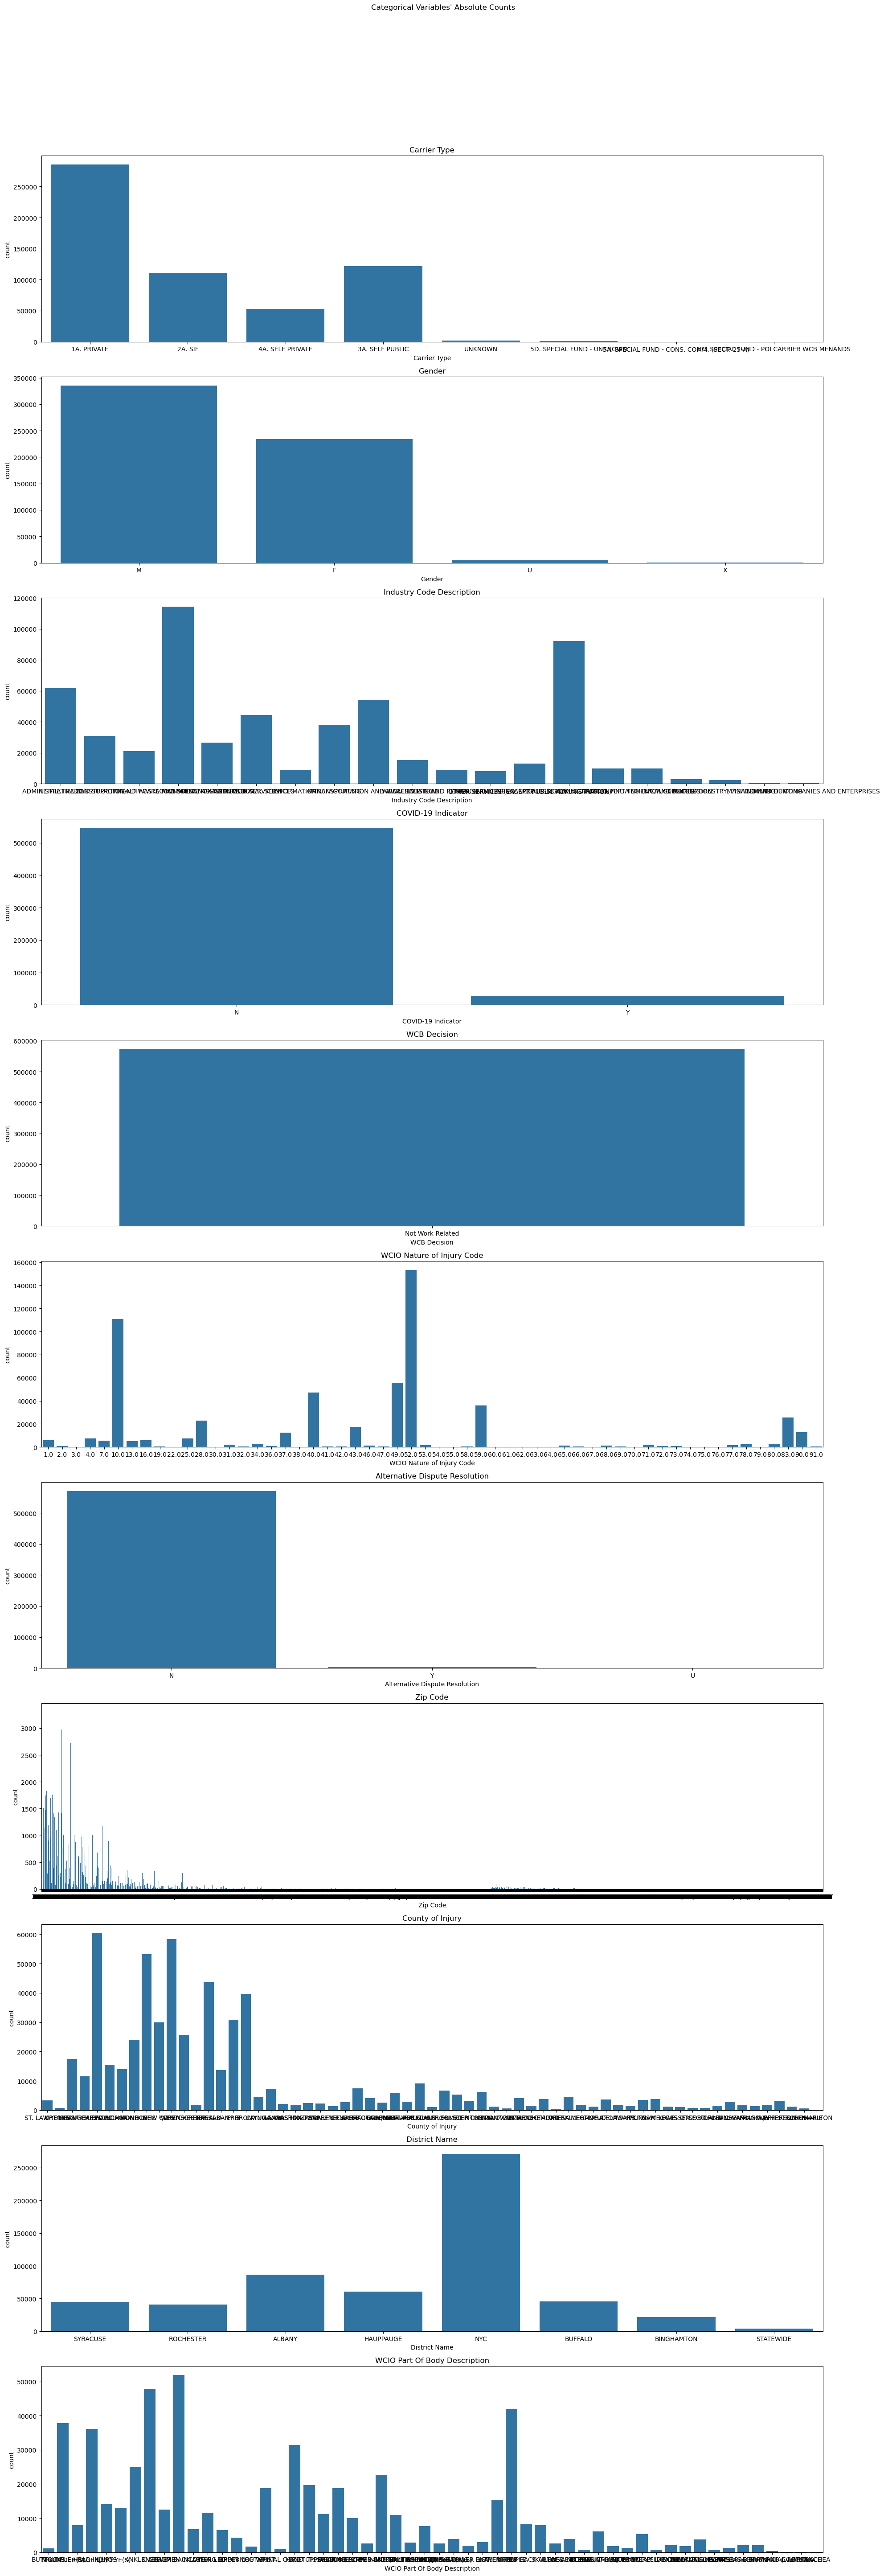

In [24]:
n_cols = 1
n_rows = (len(train_data_cat2.select_dtypes(include=['object']).columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Prepare the figure with specified dimensions
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), tight_layout=True)

# Plot data
for ax, feat in zip(axes.flatten(), train_data_cat2.select_dtypes(include=['object']).columns):
    sns.countplot(x=train_data_cat2[feat], ax=ax)
    ax.set_title(feat)

title = "Categorical Variables' Absolute Counts"
plt.suptitle(title, y=1.05)  # Adjust the y position of the suptitle if necessary
plt.show()

- carrier type
- gender 
- industry code description 
- covid 19 indicator 
- wcb decision 
- wcio Nature of industry code 
- alternative dispute resolution
- zip code 
    - as a lot of different value which make sence but this might create a lot of noise in during the modelisation
- county of injury
- district name
- wcio part of the body description

In [12]:
train_data_cat2.describe().T

,count,mean,min,25%,50%,75%,max
C-3 Date,187245,2021-07-26 21:31:28.449892096,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00
Accident Date,570337,2021-04-28 21:00:27.892983296,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00
Assembly Date,574026,2021-07-19 19:01:36.894565888,2020-01-01 00:00:00,2020-10-27 00:00:00,2021-07-30 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00


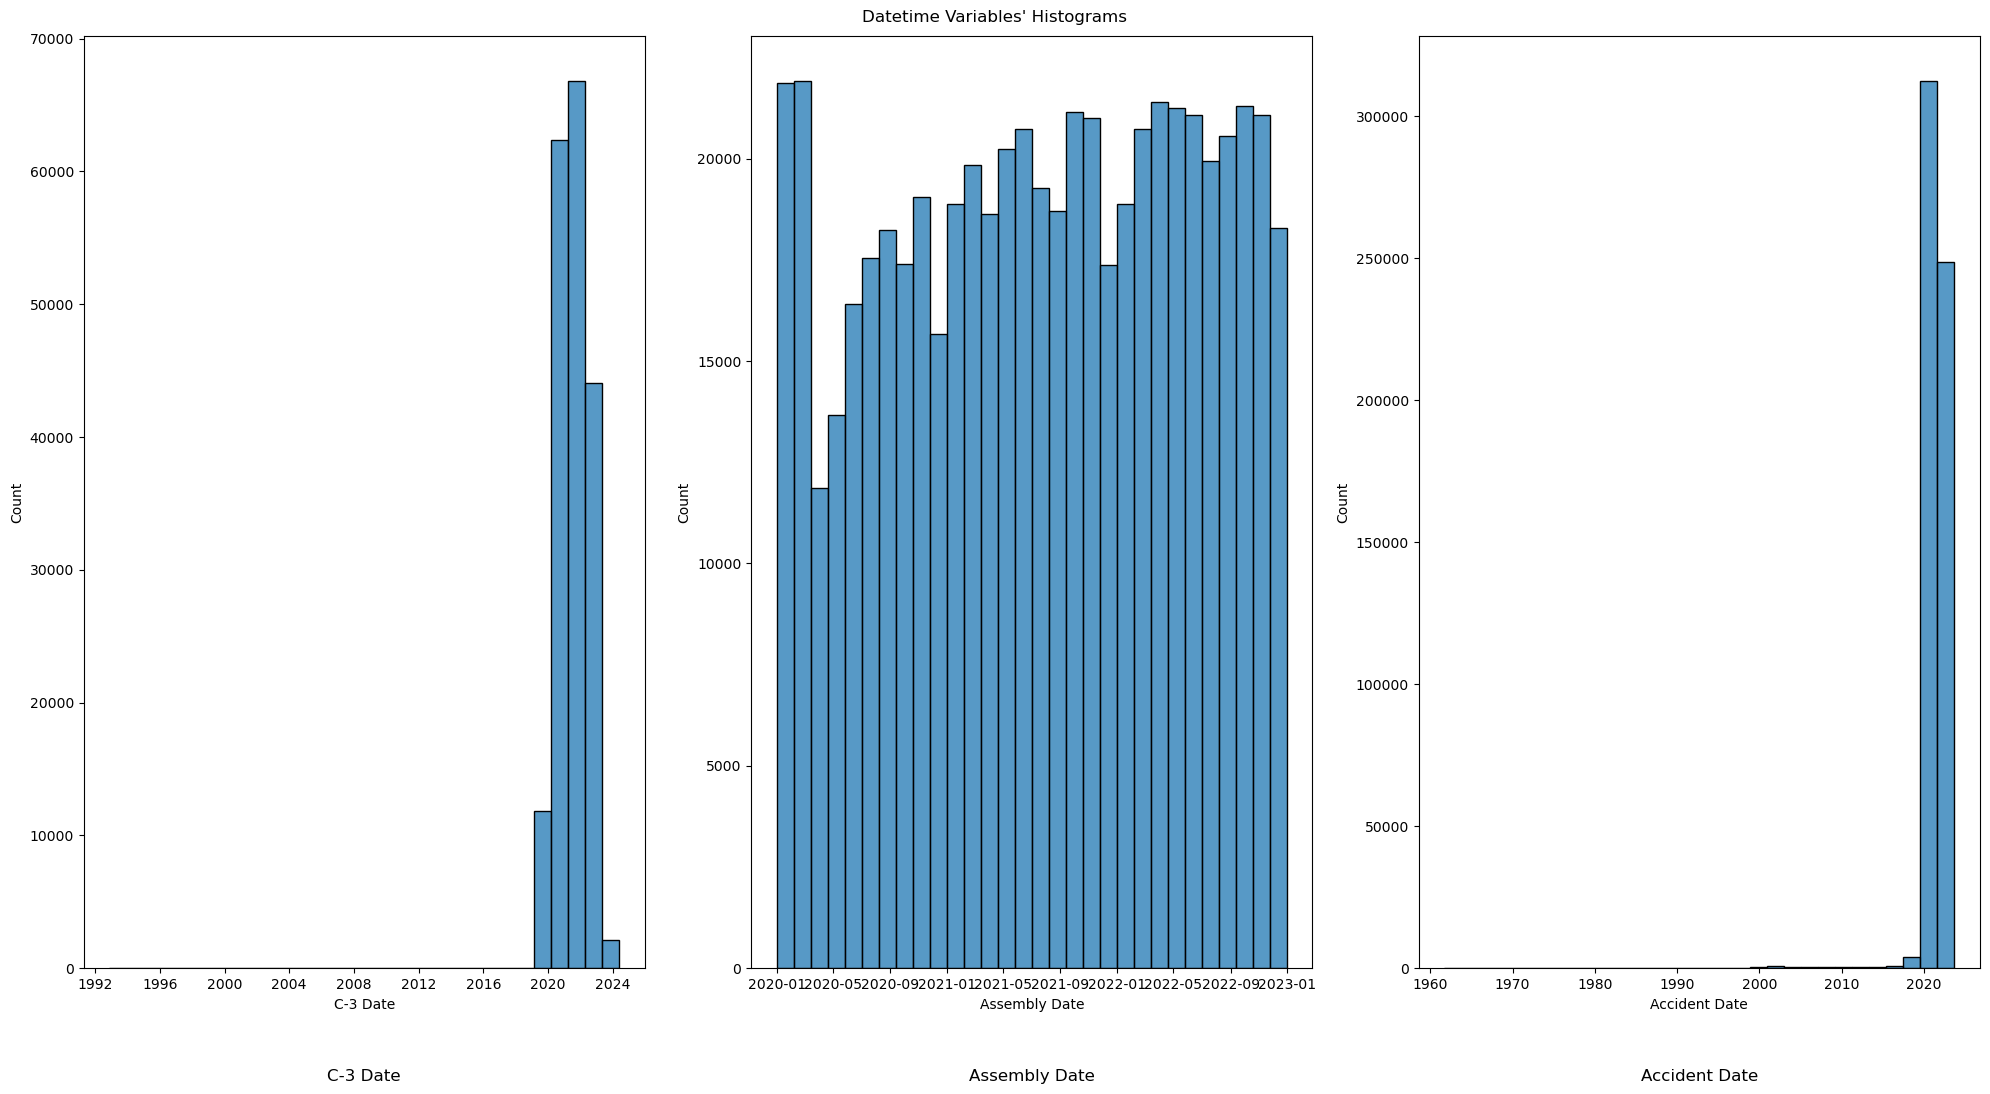

In [21]:
features = ['C-3 Date', 'Assembly Date', 'Accident Date']

# Set up the figure with the specified number of rows and columns
sp_rows = 1
sp_cols = 3

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

# Plot data
for ax, feat in zip(axes.flatten(), features):
    sns.histplot(train_data_cat2[feat], ax=ax, bins=30)
    ax.set_title(feat, y=-0.13)

title = "Datetime Variables' Histograms"

plt.suptitle(title)
plt.show()

- c-3 date
- accident date 
- assembly date 